# TS3

<img src="../img/TS3.png">

<img src="../img/TS3_PAPEL1.png">

Buscamos los polos y ceros:

In [2]:
from sympy import  *
import numpy as np
from sympy.abc import s
from IPython.display import display, Math
from splane import pzmap, GroupDelay, bodePlot
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

coeffs_den=[0.25892,0,0,0,0,0,0,0,1]

root = np.roots(coeffs_den)

display(root)

array([-1.09387991+0.45309989j, -1.09387991-0.45309989j,
       -0.45309989+1.09387991j, -0.45309989-1.09387991j,
        0.45309989+1.09387991j,  0.45309989-1.09387991j,
        1.09387991+0.45309989j,  1.09387991-0.45309989j])

Ahora debemos hallar los coeficientes de $T(jw)$

<img src="../img/TS3_PAPEL2.png">

In [5]:
a, b, c, d, e = symbols("a,b,c,d,e")

ec1 = Eq(a, 0.51)
ec2 = Eq(e,1)
ec3 = Eq(2*a*c - b*b, 0)
ec4 = Eq(-2*d*b + c*c +2*a*e, 0)
ec5 = Eq(2*c*e -d*d, 0)

respuesta = solve([ec1,ec2,ec3,ec4,ec5],a,b,c,d,e)#Salen varios resultados

#display(respuesta)

Uso el que me da raices complejas conjugadas y con $\sigma < 0$

In [7]:
for i in range(4):
    if all((np.roots(respuesta[i]).real) < 0) :
        coeff = list(respuesta[i])#Guardo la respuesta que utilizo
        my_roots = np.roots(respuesta[i])


[0.51, 1.57702279727836, 2.43823617954478, 2.20827361508703, 1.0]

array([-0.45284243+1.09325835j, -0.45284243-1.09325835j,
       -1.09325835+0.45284243j, -1.09325835-0.45284243j])

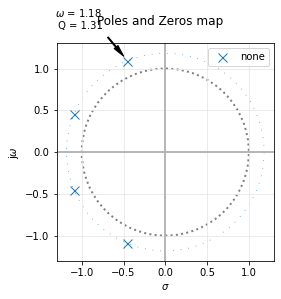

In [10]:
coeff = eval(str(coeff))
my_tf = TransferFunction( [1], coeff )

pzmap(my_tf, 4) #S plane pole/zero plot      

display(coeff)

display(my_roots)

Una vez hallados los polos del pasabajos tengo que obtener el circuito que me los genere. 
Para eso vuelvo a subdividir  $T(jw)$ en  $T(jw) = T_1(jw)*T_2(jw)$
Para hallar $T_1(jw)$ y $T_2(jw)$ uso los polos. De ellos obtengo su $\omega_o$ y $Q$

Como es un modelo de Maxima plancidad el $\omega_o$ sera igual en todos los casos, pero el $Q$ no.

In [21]:
wo = abs(my_roots[0])
print("wo =",wo)

q1 = 1/(2*cos(atan(my_roots[0].imag/my_roots[0].real)))
print("Q1 =",q1)

q2 = 1/(2*cos(atan(my_roots[2].imag/my_roots[2].real)))
print("Q2 =",q2)

wo = 1.1833343078048608
Q1 = 1.30656296487638
Q2 = 0.541196100146197


En base a esto armare mis funciones transferencia $T_1(jw)$ y $T_2(jw)$

Sabemos que en un pasabajos la transferencia es:
\begin{equation}
T(s) = \frac{\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

entonces reemplazamos con los valores:

\begin{equation}
T_1(s) = \frac{1.183^2}{s^2+s\frac{1.183}{1.3065}+1.183^2}.
\end{equation}

\begin{equation}
T_2(s) = \frac{1.183^2}{s^2+s\frac{1.183}{0.5412}+1.183^2}.
\end{equation}

y sabiendo que:

$\omega_0^2 = \frac{1}{LC}$ y $\frac{\omega_0}{Q}= \frac{R}{L}$

Adoptamos un valor, R=1 y operando nos queda:

$R_1=1, L_1=0.457, C_1=1.5693$

$R_2=1, L_2=1.11, C_2=0.6469$

Hacemos el circuito equivalente. Para eso tenemos que bufferear ambos circuitos:

<img src="../img/pasa_bajos_ord4.png">



Ahora, transformaremos el circuito pasabajos a un pasaaltos, Para esto, hacemos uso de la función de transformación $p=K(s)=1/s $. Aplicamos la misma a las impedancias del capacitor, inductor y resistor:

$Z_{lp\_R} (p) = R = Z_{hp\_R} (s)$

$Z_{lp\_L} (p) = p*L = \frac{L}{s} = \frac{1}{C_{eq}*s} = Z_{hp\_C} (s)$

$Z_{lp\_C} (p) = \frac{1}{p*C} = \frac{s}{C} = L_{eq} * s = Z_{hp\_L} (s)$

Nos queda:

$C_{eq1}= 2.188 , L_{eq1}=0.6372$

$C_{eq2}= 0.9 , L_{eq2}=1.546$

<img src="../img/pasa_altos_ord4.png">
<img src="../img/alpha_fpa.png">

Podemos ver que en $\omega = 1$, $\alpha = 1db$ y para $\omega < 0.286$ r/s, $\alpha > 35db$

Podemos decir que se cumplen los requisitos de la plantilla. Ahora hay que desnormalizar los valores:

$\omega = \omega_N \Omega_\omega$ ---> $\Omega_\omega =3500$

Para el pasabajos primero:


\begin{equation}
T_1(s) = \frac{4130^2}{s^2+s\frac{4130}{1.3065}+4130^2}.
\end{equation}

\begin{equation}
T_2(s) = \frac{4130^2}{s^2+s\frac{4130}{0.5412}+4130^2}.
\end{equation}

Despejamos los valores desnormalizados, para ello adopto el valor $C = 1\mu F$

Finalmente:

$R_1=448\Omega$, $L_1= 58.62mHy$ , $C_1=1\mu F$,$R_1=184\Omega$, $L_2= 58.62mHy$ , $C_2=1\mu F$ 

<img src="../img/fpb_w3500.png">

Podemos ver que se sigue cumpliendo que para $\omega = \omega_s$ el $\alpha = 1db$